# **Paper, Rock, Scissor**
Membuat program yang mampu menganali bentuk tangan yang membentuk gunting, batu, atau kertas

# **About Me**
Nama: Rasio Ganang Atmaja <br>
Email: rasioganangatmaja@gmail.com



---



# **1. Download dataset**
download dataset [rockpaperscissors](https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip) dari dicoding menggunakan wget command

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-03 02:19:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.74MB/s    in 44s     

2020-11-03 02:20:36 (6.93 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# **2. Proses Extraksi file**
ekstraksi menggunakan packge zipfile dan inisiaisasi path dataset

In [2]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
#inisialisasi path
base_dir = '/tmp/rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#memastikan folder rockpaperscissors ada
os.listdir(base_dir)

['rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

# **3. Memisahkan dataset menjadi data training dan data validasi**
Memecah dataset menjadi dua bagian data training dan data validasi dengan ukuran validation set 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel). 

Alur:
- Membuat base folder untuk train dan validations
- Membuat sub folder untuk rock papaer scissor di folder train dan validations
- Split dataset
- Menyalin semua gambar train dan validasi ke masing masing folder (tran/validation)

In [15]:
# Membuat base directory untuk train dan validations
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, "val")
os.mkdir(val_dir)

# Membuat sub folder untuk rock papaer scissor di folder train dan validations
train_rock = os.path.join(train_dir, 'rock')
os.mkdir(train_rock)
train_paper = os.path.join(train_dir, 'paper')
os.mkdir(train_paper)
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors)

val_rock = os.path.join(val_dir, 'rock')
os.mkdir(val_rock)
val_paper = os.path.join(val_dir, 'paper')
os.mkdir(val_paper)
val_scissors = os.path.join(val_dir, 'scissors')
os.mkdir(val_scissors)

In [16]:
# Split dataset 
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [19]:
# Menyalin semua gambar train dan validasi ke masing masing folder (tran/validation)
import shutil

# Data Training
for rock in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, rock), os.path.join(train_rock, rock))
for paper in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, paper), os.path.join(train_paper, paper))
for scissors in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, scissors), os.path.join(train_scissors, scissors))    

In [20]:
# Data Validation
for rock in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, rock), os.path.join(val_rock, rock))
for paper in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, paper), os.path.join(val_paper, paper))
for scissors in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, scissors), os.path.join(val_scissors, scissors))

In [28]:
# Jumlah data total
rock = len(os.listdir(rock_dir))
paper = len(os.listdir(paper_dir))
scissors = len(os.listdir(scissors_dir))
total_data = rock + paper + scissors
print("Total data = ", total_data)


# Memastikan Jumlah Dataset
rock_train_count = len(os.listdir(train_rock))
paper_train_count = len(os.listdir(train_paper))
scissors_train_count = len(os.listdir(train_scissors))
train_total = rock_train_count + paper_train_count + scissors_train_count
print("Total Data Trainig = ", train_total)

rock_val_count = len(os.listdir(val_rock))
paper_val_count = len(os.listdir(val_paper))
scissors_val_count = len(os.listdir(val_scissors))
val_total = rock_val_count + paper_val_count + scissors_val_count
print("Total Data Validation = ", val_total)

Total data =  2188
Total Data Trainig =  1312
Total Data Validation =  876


# **4. Membuat ImageGenerator**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **5. Membuat CNN**

ALur:
1. menentukan konfigurasi pixel
2. set model to Sequentian
3. compile konfigurasi model
4. train data.

In [51]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [52]:
# Compile model ddengan categorical_crossentropy
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [53]:
# latih model dengan model.fit 
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 43s - loss: 1.1561 - accuracy: 0.3400 - val_loss: 1.0632 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 43s - loss: 0.9203 - accuracy: 0.5738 - val_loss: 0.6050 - val_accuracy: 0.7875
Epoch 3/20
25/25 - 43s - loss: 0.4642 - accuracy: 0.8263 - val_loss: 0.4816 - val_accuracy: 0.7937
Epoch 4/20
25/25 - 43s - loss: 0.3577 - accuracy: 0.8750 - val_loss: 0.2274 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 46s - loss: 0.1918 - accuracy: 0.9250 - val_loss: 0.2303 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 43s - loss: 0.1571 - accuracy: 0.9400 - val_loss: 0.2209 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 43s - loss: 0.1540 - accuracy: 0.9425 - val_loss: 0.1322 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 43s - loss: 0.1265 - accuracy: 0.9500 - val_loss: 0.1444 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 43s - loss: 0.1120 - accuracy: 0.9650 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 10/20
25/25 - 42s - loss: 0.1177 - accuracy: 0.9725 - val_loss: 0.0843 - val_accuracy: 0.9563
Epoch 11/

# **6. Memprediksi inputan gambar**

Saving hJuytZrZ7fR1CWyi.png to hJuytZrZ7fR1CWyi.png
hJuytZrZ7fR1CWyi.png
scissors


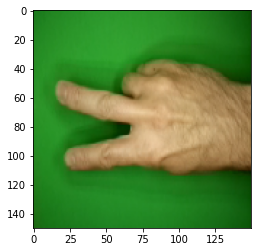

In [59]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')